In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, GlobalAveragePooling2D, InputLayer, LeakyReLU
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16, resnet
from keras.layers import *
from keras.models import Model,Sequential
from keras import optimizers
from keras import regularizers
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import glob 
import csv
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split


C:\Users\sagor\AppData\Local\Temp\ipykernel_8432\2297277722.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
def gen_label(directory):
    label = []
    for dir in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dir)):
            if (dir == 'Cancer'):
                label.append(str(0))
            elif (dir == 'Healthy'):
                label.append(str(1))
    return label

def get_path(directory):
    path = []
    for dirs in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dirs)):
            path.append(dirs + "/" +files)
    return path

In [3]:
train_y = gen_label('./dataset/train')
train_x = get_path('./dataset/train')

In [4]:
df = pd.DataFrame({'filename': train_x,
                  'category': train_y})
print(df)


                           filename category
0             Cancer/Cancer (1).jpg        0
1             Cancer/Cancer (1).tif        0
2            Cancer/Cancer (10).jpg        0
3           Cancer/Cancer (100).jpg        0
4          Cancer/Cancer (1002).JPG        0
...                             ...      ...
3664  Healthy/Not Cancer  (995).jpg        1
3665  Healthy/Not Cancer  (996).jpg        1
3666  Healthy/Not Cancer  (997).jpg        1
3667  Healthy/Not Cancer  (998).jpg        1
3668  Healthy/Not Cancer  (999).jpg        1

[3669 rows x 2 columns]


In [5]:
train_df, valid_df = train_test_split(df, test_size=0.25)
print(train_df.shape)
print(valid_df.shape)

(2751, 2)
(918, 2)


In [6]:
image_data = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2,
                                zoom_range=(0.99,0.99))

def preprocessingTrain(path):
    image = image_data.flow_from_directory(directory=path, 
                                           target_size=(224,224), 
                                           batch_size=8, 
                                           seed=123,
                                           subset='training',)
    return image

In [7]:
def preprocessingVal(path):
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path,
                                           seed=123,
                                           target_size = (224,224),
                                           batch_size = 8,
                                           )
    return image

In [8]:
def preprocessingTest(path):
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path,
                                           seed=123,
                                           target_size = (224,224),
                                           batch_size = 8,
                                           )
    
    return image

In [9]:
path = './dataset/train'
train_data = preprocessingTrain(path)

Found 2936 images belonging to 2 classes.


In [10]:
path = './dataset/val'
val_data= preprocessingVal(path)

Found 909 images belonging to 2 classes.


In [11]:
path = './dataset/test'
test_data = preprocessingTest(path)

Found 909 images belonging to 2 classes.


In [12]:
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model = keras.Sequential()

model.add(InputLayer(input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten()) #


# model.add(Dense(2048, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.3))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
# model.add(Dense(512, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.3))
model.add(Dense(2, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              205521920 
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
# Early stopping and model checkpoint
from keras import utils, callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_loss", 
                                        mode="min", 
                                        patience=5, 
                                        restore_best_weights = True)

In [15]:
# model = Sequential()
history = model.fit_generator(train_data,
                              verbose=1,
                              callbacks = [earlystopping],
                              epochs=30,
                              validation_data=(val_data))

c:\Users\sagor\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
367/367 [==============================] - 51s 128ms/step - loss: 0.5358 - accuracy: 0.7599 - val_loss: 1.5911 - val_accuracy: 0.8207
Epoch 2/30
367/367 [==============================] - 45s 123ms/step - loss: 0.2843 - accuracy: 0.8927 - val_loss: 0.1618 - val_accuracy: 0.9560
Epoch 3/30
367/367 [==============================] - 45s 124ms/step - loss: 0.1990 - accuracy: 0.9220 - val_loss: 0.2936 - val_accuracy: 0.8658
Epoch 4/30
367/367 [==============================] - 45s 124ms/step - loss: 0.1294 - accuracy: 0.9533 - val_loss: 0.3799 - val_accuracy: 0.8614
Epoch 5/30
367/367 [==============================] - 47s 127ms/step - loss: 0.1200 - accuracy: 0.9550 - val_loss: 0.1299 - val_accuracy: 0.9670
Epoch 6/30
367/367 [==============================] - 47s 128ms/step - loss: 0.1149 - accuracy: 0.9608 - val_loss: 0.1881 - val_accuracy: 0.9373
Epoch 7/30
367/367 [==============================] - 47s 127ms/step - loss: 0.0901 - accuracy: 0.9704 - val_loss: 0.0975 - val_ac

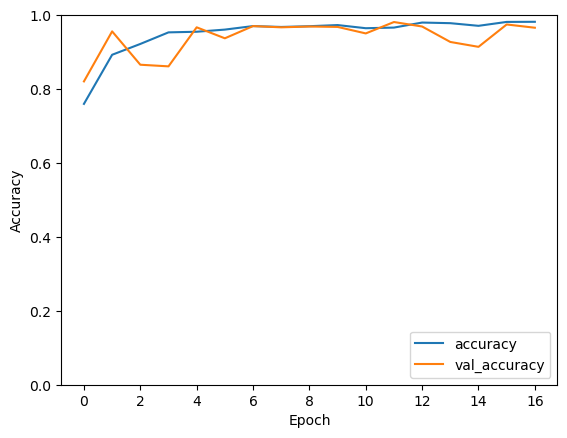

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


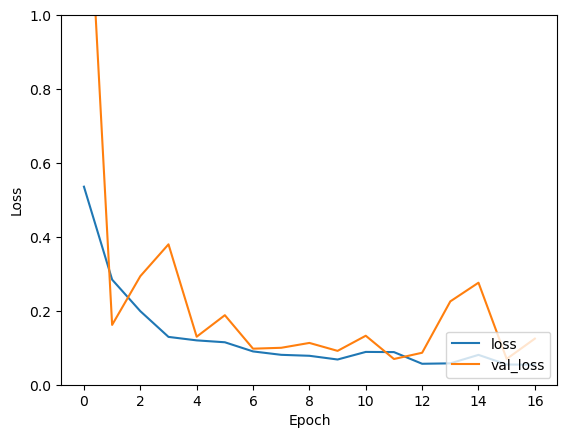

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [18]:
model.pop()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              205521920 
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4

In [20]:
feature_list = []
for path in train_df['filename'].to_numpy():
    full_path = './dataset/train/'+ path
    x = load_img(full_path,target_size=(224,224))
    img_array = img_to_array(x)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    feature_list.append(features)
    
# feat_lst = np.reshape(feature_list,(-1,7*7*512))

In [21]:
feat_lst = np.reshape(feature_list,(-1,1024))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# features = tarnsfer_model.predict(test_data)
# y  = test_label.astype('int')
y = train_df['category'].to_numpy()
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feat_lst,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 2020)

In [23]:
import csv

# Assuming `features` is a numpy array
import numpy as np

# Define the image names
img_names = [y[i] for i in range(feat_lst.shape[0])]

# Write the features to a CSV file with column names and image names
with open('features.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image Label'] + list(range(1, feat_lst.shape[1]+1)))
    for i, row in enumerate(feat_lst):
        writer.writerow([img_names[i]] + list(row))

# Read the features from the CSV file
with open('features.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader) # Skip the first row (headers)
    img_names = [row[0] for row in reader] # Extract the image names
    feat_lst = np.array([row[1:] for row in reader]).astype(float) # Extract the features


RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4020)

#train classifier
rf_classifier.fit(train_features, train_labels)

# Make predictions on the test data
test_predictions = rf_classifier.predict(test_features)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9745916515426497


Precision for Brain Tumor

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions, pos_label='0')
recall = recall_score(test_labels, test_predictions, pos_label='0')
f1 = f1_score(test_labels, test_predictions, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9615384615384616
Recall:  0.9933774834437086
F1-score:  0.977198697068404


Precision for Healthy

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions, pos_label='1')
recall = recall_score(test_labels, test_predictions, pos_label='1')
f1 = f1_score(test_labels, test_predictions, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9916317991631799
Recall:  0.9518072289156626
F1-score:  0.971311475409836


KNN

In [27]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knnClassifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)  
knnClassifier.fit(train_features, train_labels)  

# Make predictions on the test data
test_predictions_knn = knnClassifier.predict(test_features)

# Calculate accuracy on the test data
test_accuracy_knn = accuracy_score(test_labels, test_predictions_knn)

print("Test accuracy: ", test_accuracy_knn)

Test accuracy:  0.911070780399274


Brain Tumor

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_knn, pos_label='0')
recall = recall_score(test_labels, test_predictions_knn, pos_label='0')
f1 = f1_score(test_labels, test_predictions_knn, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.8624641833810889
Recall:  0.9966887417218543
F1-score:  0.924731182795699


Healthy

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_knn, pos_label='1')
recall = recall_score(test_labels, test_predictions_knn, pos_label='1')
f1 = f1_score(test_labels, test_predictions_knn, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.995049504950495
Recall:  0.8072289156626506
F1-score:  0.8913525498891354


ADA Boost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ab_classifier = AdaBoostClassifier(n_estimators=10, random_state=2020)
ab_classifier.fit(train_features, train_labels)
test_predictions_ab = ab_classifier.predict(test_features)
test_accuracy_ab = accuracy_score(test_labels, test_predictions_ab)

print("Test accuracy: ", test_accuracy_ab)

Test accuracy:  0.9473684210526315


Brain Tumor

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_ab, pos_label='0')
recall = recall_score(test_labels, test_predictions_ab, pos_label='0')
f1 = f1_score(test_labels, test_predictions_ab, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9361022364217252
Recall:  0.9701986754966887
F1-score:  0.9528455284552844


Healthy

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_ab, pos_label='1')
recall = recall_score(test_labels, test_predictions_ab, pos_label='1')
f1 = f1_score(test_labels, test_predictions_ab, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9621848739495799
Recall:  0.9196787148594378
F1-score:  0.9404517453798769


In [33]:
def get_path(directory):
    path = []
    for dirs in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dirs)):
            path.append(dirs + "/" +files)
    return path

In [34]:
test_x = get_path('./dataset/test/')

In [35]:
# define function for evaluating model performance on test images
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img

testdf = pd.DataFrame({'filename': test_x})
test_sample = testdf.sample(n = 20, random_state=2020)

def test_img(model,name):
    result_lst = []
    for path in test_sample['filename'].to_numpy():
        full_path = './dataset/test/'+path
        x = load_img(full_path, target_size=(224,224))
        img_array = img_to_array(x)
        img_array = np.expand_dims(img_array, axis=0)
        if name == 'random_forest':
            features = model.predict(img_array)
            result = rf_classifier.predict(features)
        elif name == 'knn':
            features = model.predict(img_array)
            result = knnClassifier.predict(features)
        elif name == 'adaboost':
            features = model.predict(img_array)
            result = ab_classifier.predict(features)
        result = 'Healthy' if float(result) > 0.5 else 'Brain Tumor'
        
        result_lst.append(result)
    return result_lst

In [36]:

rf_result = test_img(model,'random_forest')
ada_result = test_img(model,'adaboost')
knn_result = test_img(model,'knn')

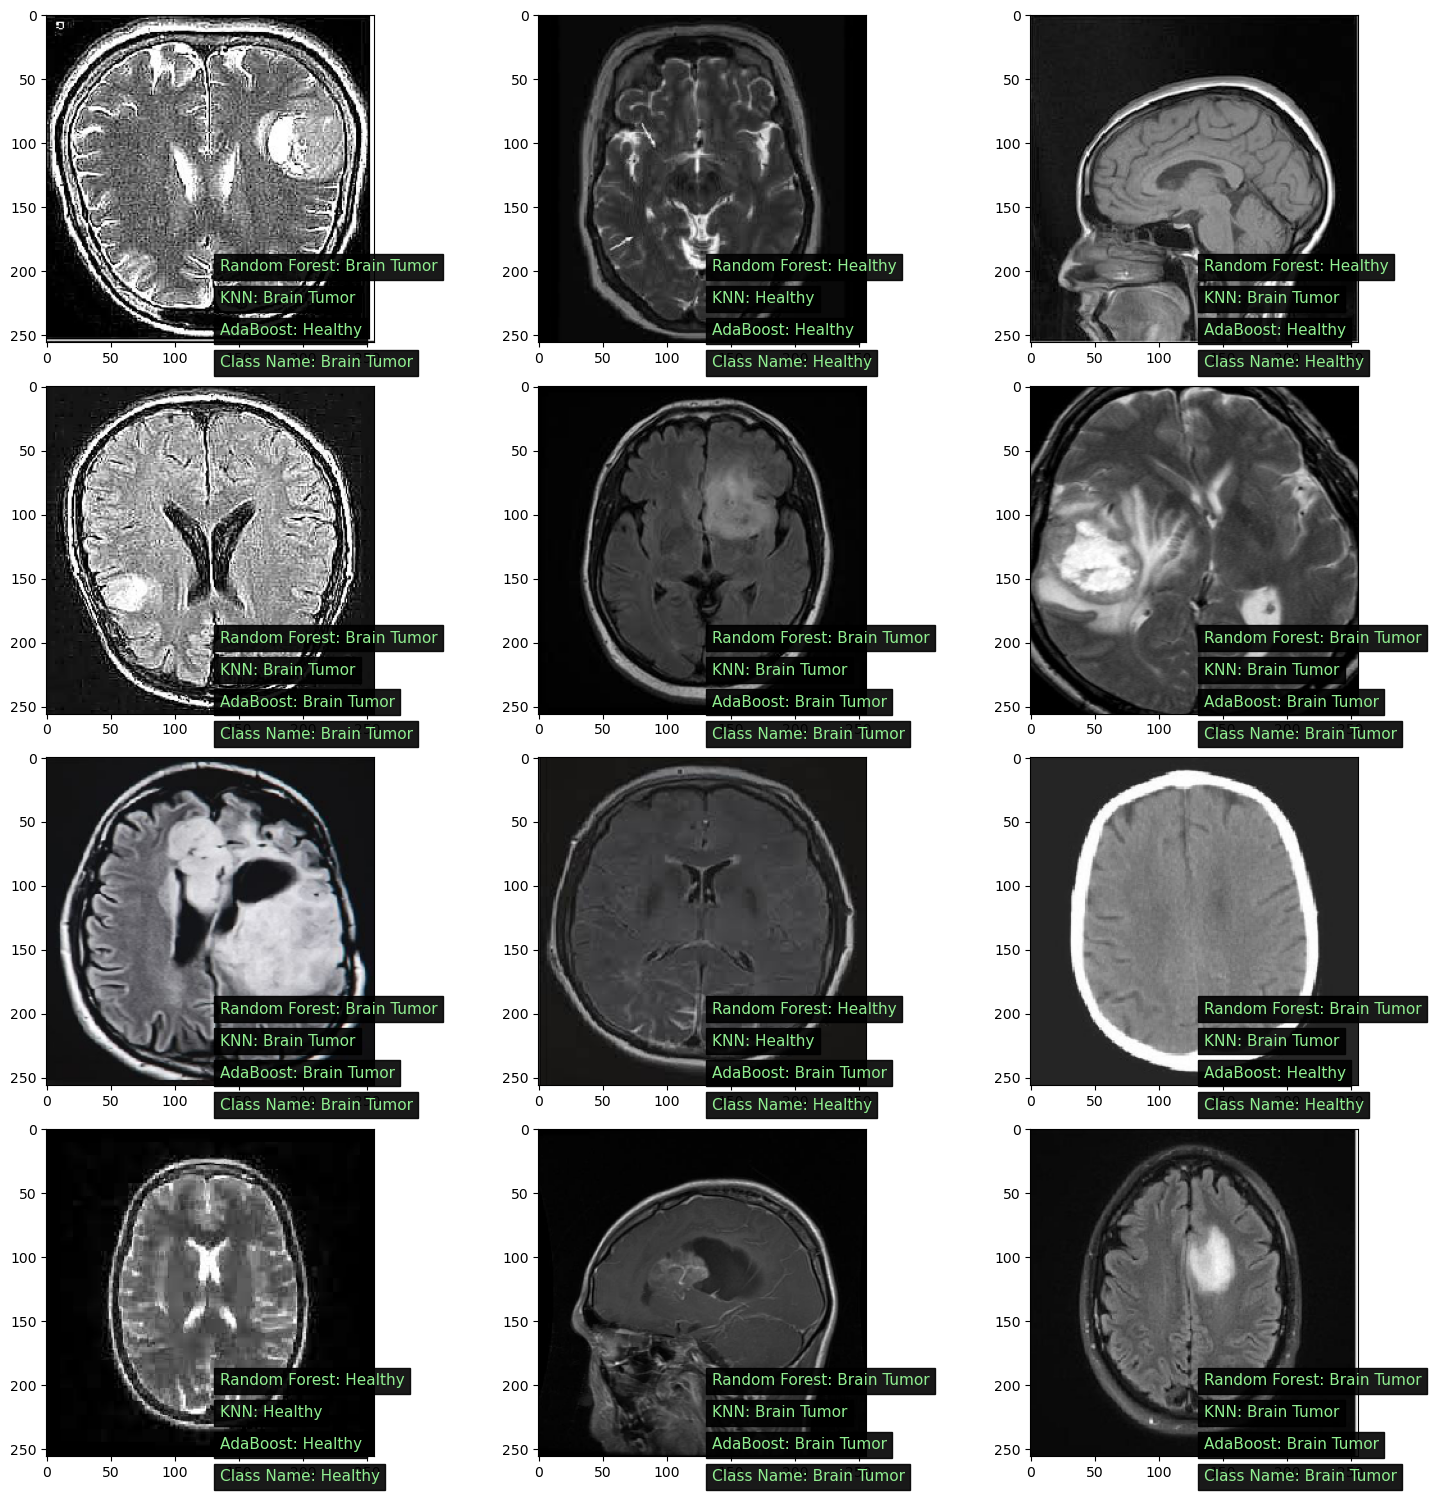

In [37]:
# plotting images with prediction
pred_results  = list(zip(rf_result,knn_result, ada_result))
test_array = test_sample['filename'].to_numpy()

plt.figure(figsize=(15, 15))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    rf, knn, ab= pred_results[i]
    img = test_array[i]
    path = './dataset/test/' + img
    name = img.split('/')[0]
    if(name == 'Cancer'):
        name = 'Brain Tumor'
    image = load_img(path, target_size=(256,256))
    # plt.text(135, 200, 'Custom CNN: {}'.format(cust), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 200, 'Random Forest: {}'.format(rf), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 225, 'KNN: {}'.format(knn), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 250, 'AdaBoost: {}'.format(ab), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 275, 'Class Name: {}'.format(name), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    
    plt.imshow(image)

plt.tight_layout()
plt.show()